In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
rootDir="/content/drive/MyDrive/Comp Med Group Project/genes_miRNA_MKKC"
bpDir="mirna_genes_bp.csv"
pDir="mirna_genes_panther.csv"

In [4]:
bp = pd.read_csv(os.path.join(rootDir,bpDir))
bp.columns = ["BP", "Ref_Num_Genes", "miRNA_Num_Genes",
                       "Exp_Num_Genes", "Over_Or_Under", "Fold_Enrichment", "Raw_P_Val", "FDR_P_Val"]

bp["Fold_Enrichment"].mask(bp["Fold_Enrichment"] == " < 0.01", 0.0001 , inplace=True)
bp["Fold_Enrichment"] = pd.to_numeric(bp["Fold_Enrichment"])
bp["FDR_P_Val"] = pd.to_numeric(bp["FDR_P_Val"])
bp["Fold_Enrichment"].values

array([1.007e+01, 8.090e+00, 7.960e+00, 7.400e+00, 7.280e+00, 6.470e+00,
       6.470e+00, 6.040e+00, 6.040e+00, 5.970e+00, 5.030e+00, 5.030e+00,
       4.930e+00, 4.790e+00, 4.660e+00, 4.660e+00, 4.660e+00, 4.500e+00,
       4.480e+00, 4.450e+00, 4.430e+00, 4.310e+00, 4.310e+00, 4.310e+00,
       4.310e+00, 4.210e+00, 4.160e+00, 4.040e+00, 4.020e+00, 4.010e+00,
       3.980e+00, 3.910e+00, 3.880e+00, 3.830e+00, 3.810e+00, 3.750e+00,
       3.630e+00, 3.620e+00, 3.560e+00, 3.500e+00, 3.500e+00, 3.470e+00,
       3.390e+00, 3.390e+00, 3.310e+00, 3.310e+00, 3.310e+00, 3.280e+00,
       3.270e+00, 3.240e+00, 3.240e+00, 3.240e+00, 3.180e+00, 3.130e+00,
       3.120e+00, 3.120e+00, 3.120e+00, 3.110e+00, 3.090e+00, 3.070e+00,
       3.060e+00, 3.020e+00, 3.010e+00, 2.990e+00, 2.950e+00, 2.870e+00,
       2.870e+00, 2.860e+00, 2.840e+00, 2.840e+00, 2.810e+00, 2.810e+00,
       2.750e+00, 2.750e+00, 2.690e+00, 2.660e+00, 2.650e+00, 2.650e+00,
       2.650e+00, 2.650e+00, 2.640e+00, 2.630e+00, 

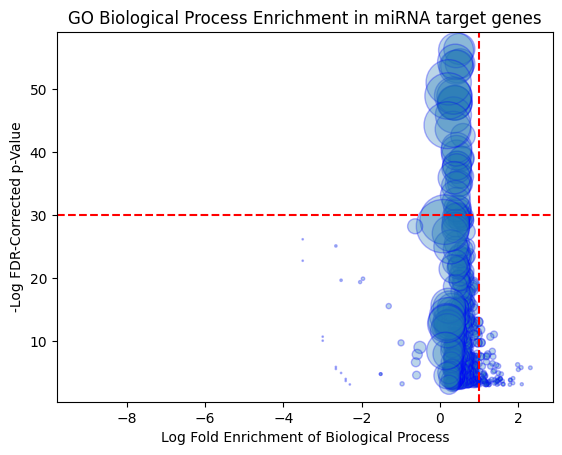

In [5]:
bp["Log_Fold_Enrichment"] = np.log(bp["Fold_Enrichment"])

bp["Log_FDR_P_Val"] = -np.log(bp["FDR_P_Val"])
bp["Log_P_Val_cmap"] = round(((bp["Log_FDR_P_Val"] + np.min(
    bp["Log_FDR_P_Val"])) * 255) / np.max(bp["Log_FDR_P_Val"]))

plt.scatter(bp["Log_Fold_Enrichment"],
            bp["Log_FDR_P_Val"], s=bp["miRNA_Num_Genes"], ec="b", alpha=0.3)
# Add horizontal line to represent p-value = 1E-30
plt.axhline(30, c="r", linestyle="dashed")
plt.axvline(1, c="r", linestyle="dashed")

plt.title("GO Biological Process Enrichment in miRNA target genes")
plt.xlabel("Log Fold Enrichment of Biological Process")
plt.ylabel("-Log FDR-Corrected p-Value")
plt.show()

In [6]:
bp["Log_FDR_P_Val"].describe()

count    537.000000
mean      10.835185
std       10.688049
min        3.001750
25%        4.062846
50%        6.219621
75%       12.995731
max       56.420405
Name: Log_FDR_P_Val, dtype: float64

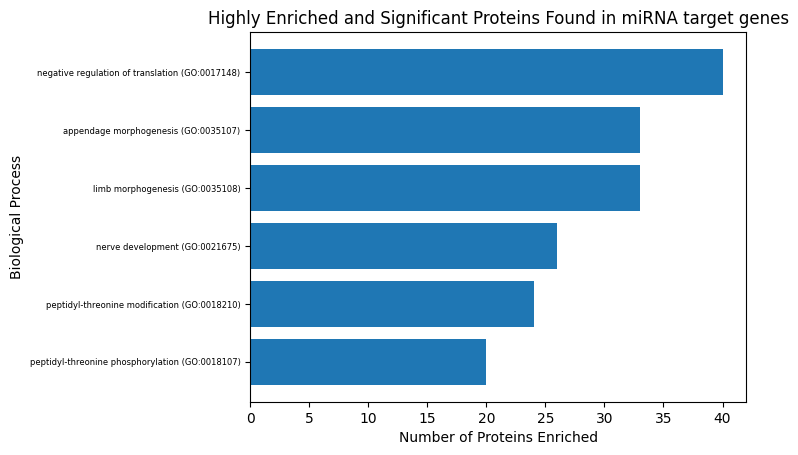

<Figure size 640x480 with 0 Axes>

In [12]:
# Filter out highly significant and enriched proteins
bp_filt = bp[(bp["Log_FDR_P_Val"] > 8) & (
    bp["Log_Fold_Enrichment"] > 1)]
bp_filt = bp_filt.sort_values(by=["miRNA_Num_Genes"])

plt.barh(y=bp_filt["BP"], width=bp_filt["miRNA_Num_Genes"])
plt.ylabel("Biological Process")
plt.xlabel("Number of Proteins Enriched")
plt.title("Highly Enriched and Significant Proteins Found in miRNA target genes")
plt.yticks(fontsize=6)
plt.show()
plt.clf()

In [8]:
panther = pd.read_csv(os.path.join(rootDir,pDir))
panther.columns = ["Pathway", "Ref_Num_Genes", "miRNA_Num_Genes",
                       "Exp_Num_Genes", "Over_Or_Under", "Fold_Enrichment", "Raw_P_Val", "FDR_P_Val"]

panther["Fold_Enrichment"].mask(panther["Fold_Enrichment"] == " < 0.01", 0.0001 , inplace=True)
panther["Fold_Enrichment"] = pd.to_numeric(panther["Fold_Enrichment"])
panther["FDR_P_Val"] = pd.to_numeric(panther["FDR_P_Val"])
panther["Fold_Enrichment"].values

array([4.04, 3.41, 2.73, 2.7 , 2.51, 2.15, 1.88, 0.92])

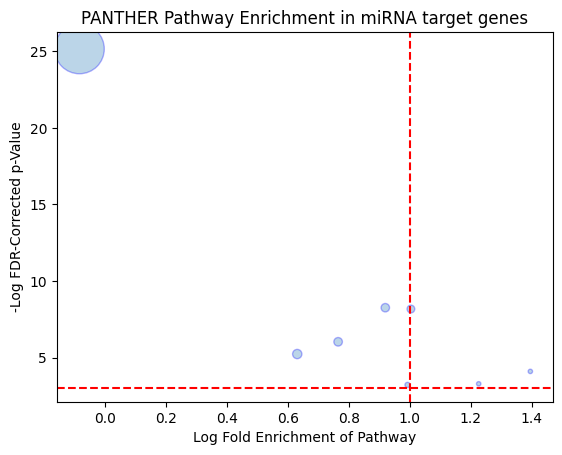

In [9]:
panther["Log_Fold_Enrichment"] = np.log(panther["Fold_Enrichment"])

panther["Log_FDR_P_Val"] = -np.log(panther["FDR_P_Val"])


plt.scatter(panther["Log_Fold_Enrichment"],
            panther["Log_FDR_P_Val"], s=panther["miRNA_Num_Genes"], ec="b", alpha=0.3)
# Add horizontal line to represent p-value = 1E-30
plt.axhline(3, c="r", linestyle="dashed")
plt.axvline(1, c="r", linestyle="dashed")

plt.title("PANTHER Pathway Enrichment in miRNA target genes")
plt.xlabel("Log Fold Enrichment of Pathway")
plt.ylabel("-Log FDR-Corrected p-Value")
plt.show()

In [10]:
panther["Log_FDR_P_Val"].describe()

count     8.000000
mean      7.931885
std       7.232552
min       3.216379
25%       3.895955
50%       5.632408
75%       8.194873
max      25.154483
Name: Log_FDR_P_Val, dtype: float64

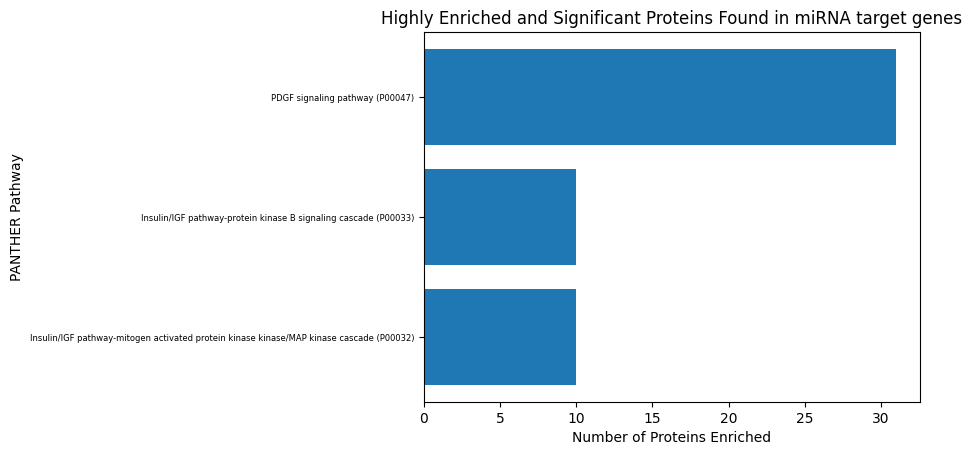

<Figure size 640x480 with 0 Axes>

In [11]:
# Filter out highly significant and enriched proteins
pan_filt = panther[(
    panther["Log_Fold_Enrichment"] > 1)]
pan_filt = pan_filt.sort_values(by=["miRNA_Num_Genes"])

plt.barh(y=pan_filt["Pathway"], width=pan_filt["miRNA_Num_Genes"])
plt.ylabel("PANTHER Pathway")
plt.xlabel("Number of Proteins Enriched")
plt.title("Highly Enriched and Significant Proteins Found in miRNA target genes")
plt.yticks(fontsize=6)
plt.show()
plt.clf()